# Introduction to Machine Learning
## Lecture 4 - Logistic Discrimination
### Notebook 1: Creating A Binary Logistic Regression Model
Prapared by: Said Bolluk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

Create a random data with n_features=2 and n_classes=2.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(
    n_samples=1000, n_features=2, centers=2, 
    center_box=(3, 15), cluster_std=2, random_state=15,
)

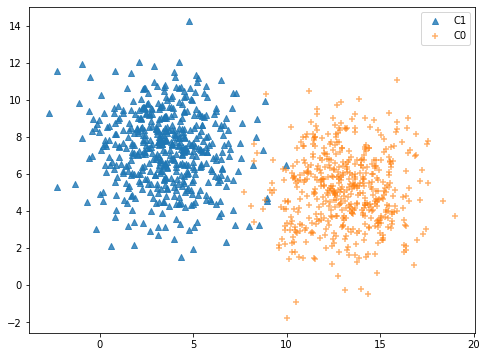

In [4]:
ones = X[y==1]
zeros = X[y==0]

plt.figure(figsize=(8, 6))
plt.scatter(ones[:, 0], ones[:, 1], marker="^", alpha=0.8, label="C1")
plt.scatter(zeros[:, 0], zeros[:, 1], marker="+", alpha=0.6, label="C0")
plt.legend()
plt.show()

In [5]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, 
    random_state=42, stratify=y,
)

In [6]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# Classification: Binary Logistic Regression

Create some useful function before getting to classification

In [7]:
# Sigmoid Function
def sigmoid(z):
    output = 1 / (1 + np.exp(-z))
    return output

In [8]:
# Define a function that return an output 
# according to the predicted probabilities
def label(y):
    if y > 0.5:
        output = 1
    else:
        output = 0
    return output

Train the model and make prediction over the test set

In [9]:
# Define initial weights 
np.random.seed(42)
W = np.random.rand(2, 1)
W1 = W[0, 0]
W2 = W[1, 0]
W0 = np.random.rand(1, 1).item()

print("<Initial Weights>")
print(f"W1: {W1:.3f}")
print(f"W2: {W2:.3f}")
print(f"W0: {W0:.3f}")

record_epoch = [9, 19, 59, 99]
weight_list = list()

# Define model parameters
epoch = 100
lr = 2e-4

acc_train = list()
acc_test = list()

for t in range(epoch):
    
    # Training
    train_preds = list()
    for x_train, r_t in zip(X_train_scaled, y_train):
        
        x1 = x_train[0]
        x2 = x_train[1]
        
        z_train = x1*W1 + x2*W2 + W0
        a_train = sigmoid(z_train)        
        y_hat = label(a_train)
        train_preds.append(y_hat)
        
        delta_w1 = lr * (r_t - a_train) * x1
        delta_w2 = lr * (r_t - a_train) * x2
        delta_w0 = lr * (r_t - a_train)

        W1 = W1 + delta_w1
        W2 = W2 + delta_w2
        W0 = W0 + delta_w0
    
    train_accuracy = np.sum(y_train==train_preds) / y_train.shape[0]
    acc_train.append(train_accuracy)
    
    # Record the weights for certain epochs
    if t in record_epoch:
        weight_list.append([W0, W1, W2])   
    
    # Testing
    test_preds = list()
    test_prob = list()
    
    for x_test in X_test_scaled:
        
        x1 = x_test[0]
        x2 = x_test[1]     
        
        z_test = x1*W1 + x2*W2 + W0
        a_test = sigmoid(z_test)
        y_hat = label(a_test)
        test_preds.append(y_hat)
    
    test_accuracy = np.sum(y_test==test_preds) / y_test.shape[0]
    acc_test.append(test_accuracy)
    
print("<Final Weights>")
print(f"W1: {W1:.3f}")
print(f"W2: {W2:.3f}")
print(f"W0: {W0:.3f}")

<Initial Weights>
W1: 0.375
W2: 0.951
W0: 0.732
<Final Weights>
W1: -2.240
W2: 0.888
W0: 0.108


Display the results on a validation curve

Test Accuracy: 0.988


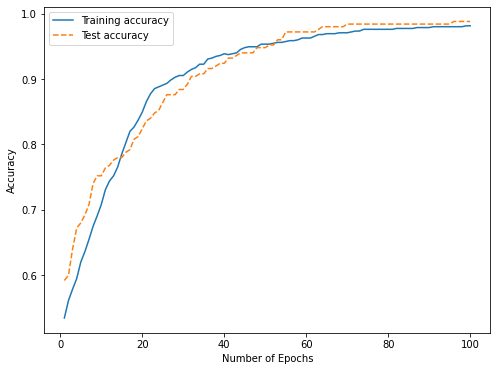

In [10]:
# Print the final test accuracy
print(f"Test Accuracy: {acc_test[-1]:.3f}")

epoch_list = np.arange(1, epoch+1)
plt.figure(figsize=(8, 6))
plt.plot(epoch_list, acc_train, label="Training accuracy")
plt.plot(epoch_list, acc_test, label="Test accuracy", linestyle="--")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let us now visualize the classification. We will use the final weights to draw the classification boundary (separating hyperplane) in 2D. Recall the formula of a line: **y = ax + b**. We need to first scale the whole dataset to make predictions.

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)

Make predictions

In [12]:
predictions = list()
for x1, x2 in X_scaled:
    z = x1*W1 + x2*W2 + W0
    a = sigmoid(z)    
    y_hat = label(a)
    predictions.append(y_hat)

Create a linear function that utilizes the weights we saved for certain epochs: y = ax + b

In [13]:
def linear(weights, x):
    W0, W1, W2 = weights[0], weights[1], weights[2]
    y = -(np.dot(x, W1) + W0) / W2
    return y

Visualize the results

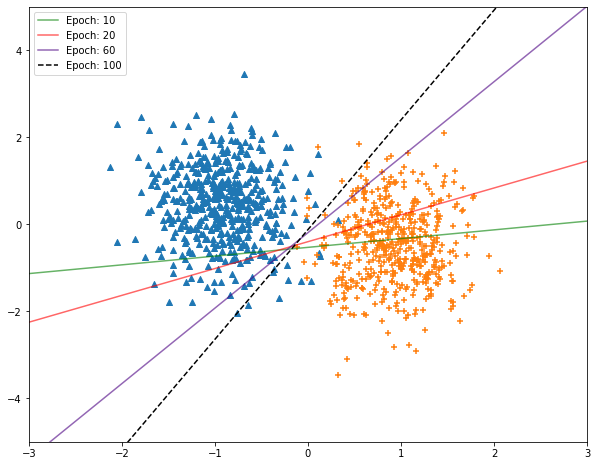

In [14]:
# Define the parameters of the decision boundary (separating hyperplane): y = ax + b
# We will draw five decision boundaries to visualize the training of Logistic Regression
x_axis = np.arange(-4, 5)

# Epoch 10
y10 = linear(weights=weight_list[0], x=x_axis)

# Epoch 20
y20 = linear(weights=weight_list[1], x=x_axis)

# Epoch 60
y60 = linear(weights=weight_list[2], x=x_axis)

# Epoch 100
y100 = linear(weights=weight_list[3], x=x_axis)

preds = np.reshape(predictions, (y.shape[0],))
one_pred = X_scaled[y==1]
zero_pred = X_scaled[y==0]

plt.figure(figsize=(10, 8))
plt.scatter(one_pred[:, 0], one_pred[:, 1], marker="^")
plt.scatter(zero_pred[:, 0], zero_pred[:, 1], marker="+")
plt.plot(x_axis, y10, label="Epoch: 10", color="green", alpha=0.6)
plt.plot(x_axis, y20, label="Epoch: 20", color="red", alpha=0.6)
plt.plot(x_axis, y60, label="Epoch: 60", color="indigo", alpha=0.6)
plt.plot(x_axis, y100, label="Epoch: 100", color="black", linestyle="--")
plt.xlim(-3, 3)
plt.ylim(-5, 5)
plt.legend()
plt.show()

Let us display the original distribution once more

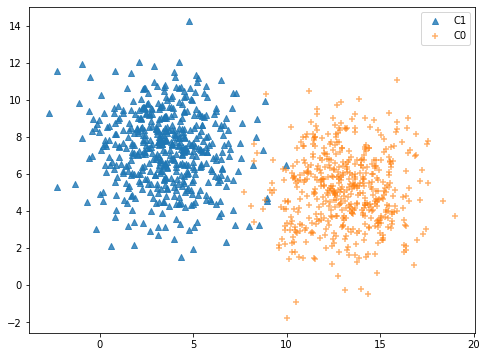

In [15]:
ones = X[y==1]
zeros = X[y==0]

plt.figure(figsize=(8, 6))
plt.scatter(ones[:, 0], ones[:, 1], marker="^", alpha=0.8, label="C1")
plt.scatter(zeros[:, 0], zeros[:, 1], marker="+", alpha=0.6, label="C0")
plt.legend()
plt.show()

**Discussion:** When we look at the figure with the decision boundaries for a different number of epochs, we can observe the model's training process. As we increased the number of epochs, our model performed better to separate classes. However, note that we did not introduce a regularization term in our model. Therefore, training with a large number of epochs would cause overfitting.

# END